In [ ]:
Case Study

Objectives:
    
• Fit a model using binary classification using logistic regression.
• Identify correlated variables and form a less complex model.

Questions:
1. We will use acoustic features to distinguish a male voice from female. 
Load the dataset from “voice.csv”, identify the target variable and do a one-hot encoding for the same. 
Split the dataset in train-test with 20% of the data kept aside for testing.
[Hint: Refer to LabelEncoder documentation in scikit-learn]

2. Fit a logistic regression model and measure the accuracy on the test set. [Hint: Refer to Linear 
                                                                              Models section in scikit-learn]

3. Compute the correlation matrix that describes the dependence between all predictors 
and identify the predictors that are highly correlated. 
Plot the correlation matrix using seaborn heatmap.
[Hint: Explore dataframe methods to identify appropriate method]

4. Based on correlation remove those predictors that are correlated and fit a logistic regression model again and compare the accuracy with that of previous model.
[Hint: Identify correlated variable pairs and remove one among them]

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data='/Users/atul595525/Desktop/learning/Edureka_courses/Python_For_Data_Science/Module7-Supervised_Learning-I/voice.csv'

df_voices = pd.read_csv(data)

df_voices.head(5)




,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [42]:
'''
1. We will use acoustic features to distinguish a male voice from female. 
Load the dataset from “voice.csv”, identify the target variable and do a one-hot encoding for the same. 
Split the dataset in train-test with 20% of the data kept aside for testing.
[Hint: Refer to LabelEncoder documentation in scikit-learn]
'''

'''
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(bridge_df[['Bridge_Types_Cat']]).toarray())
# merge with main df bridge_df on key values
bridge_df = bridge_df.join(enc_df)
bridge_df

'''


df_voices["label"] = df_voices["label"].map({"male":"0", "female":"1"})

X = df_voices.iloc[:,0:19]
Y = df_voices["label"]



In [43]:
X.head(5)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562


In [44]:
Y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: object

In [45]:
#Split the dataset in train-test with 20% of the data kept aside for testing.

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y, random_state = 10, test_size = 0.20)

In [46]:
#2. Fit a logistic regression model and measure the accuracy on the test set. 
#[Hint: Refer to Linear Models section in scikit-learn]

from sklearn.linear_model import LogisticRegression

ln_model = LogisticRegression()

ln_model.fit(x_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
predicted_data = ln_model.predict(x_test)

In [48]:
from sklearn import metrics
metrics.accuracy_score(predicted_data, y_test)

0.9274447949526814

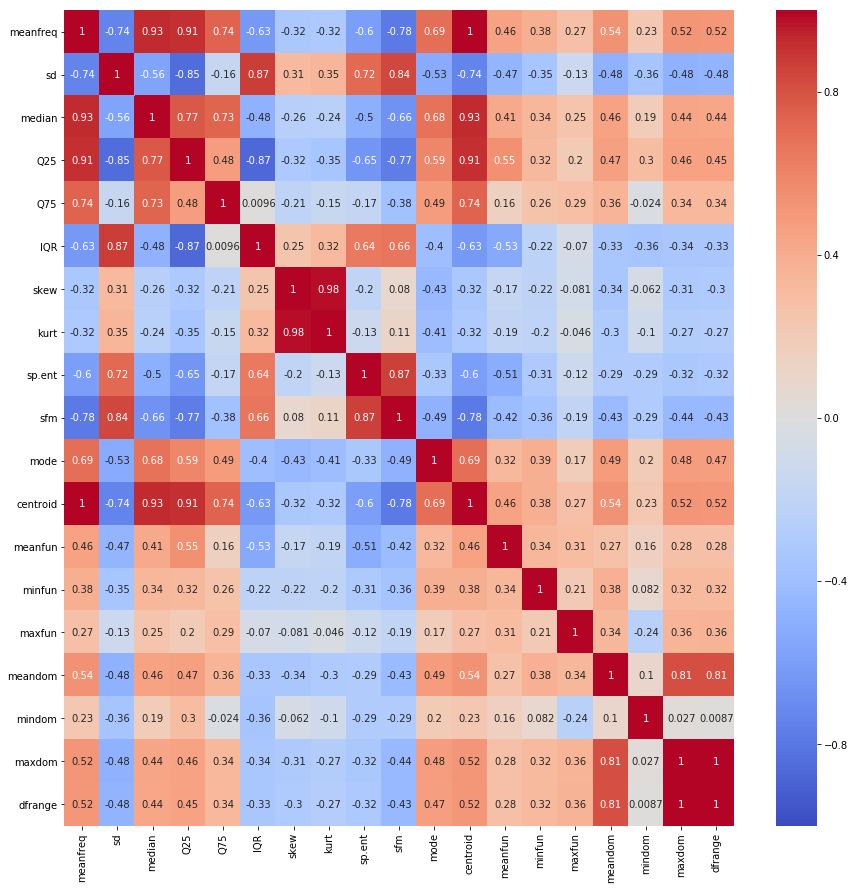

In [49]:
#3. Compute the correlation matrix that describes the dependence between all predictors and 
#identify the predictors that are highly correlated. Plot the correlation matrix using seaborn heatmap.
#[Hint: Explore dataframe methods to identify appropriate method]

corr = X.corr()

#s.heatmap(corr)
#plt.show()


plt.figure(figsize=(15,15))

sns.heatmap(X.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

In [50]:
#4. Based on correlation remove those predictors that are correlated and fit a logistic regression model 
#again and compare the accuracy with that of previous model.

#[Hint: Identify correlated variable pairs and remove one among them]

# strong correlated columns So that we can keep
# "meanfreq" -> "median", "Q25", "centroid"
# "Q25" -> "centroid"
# "maxdom" -> "dfrange"


X = X.drop("median",axis=1)
X = X.drop("Q25",axis=1)
X = X.drop("centroid",axis=1)
X = X.drop("dfrange",axis=1)

train_x, test_x, train_y, test_y = train_test_split(X, Y, random_state = 10, test_size = 0.20)

ln_model = LogisticRegression()
ln_model.fit(train_x, train_y)

predicted_data = ln_model.predict(test_x)

metrics.accuracy_score(predicted_data, test_y)

0.916403785488959